<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Deep-Learning/blob/main/DL_P04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical No 04


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8705 - loss: 0.4423 - val_accuracy: 0.9660 - val_loss: 0.1163
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9659 - loss: 0.1127 - val_accuracy: 0.9722 - val_loss: 0.0964
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9766 - loss: 0.0739 - val_accuracy: 0.9713 - val_loss: 0.0904
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9823 - loss: 0.0546 - val_accuracy: 0.9748 - val_loss: 0.0864
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9875 - loss: 0.0416 - val_accuracy: 0.9778 - val_loss: 0.0773
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9883 - loss: 0.0330 - val_accuracy: 0.9755 - val_loss: 0.0882
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9817 - val_loss: 0.0726
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9924 - loss: 0.0222 

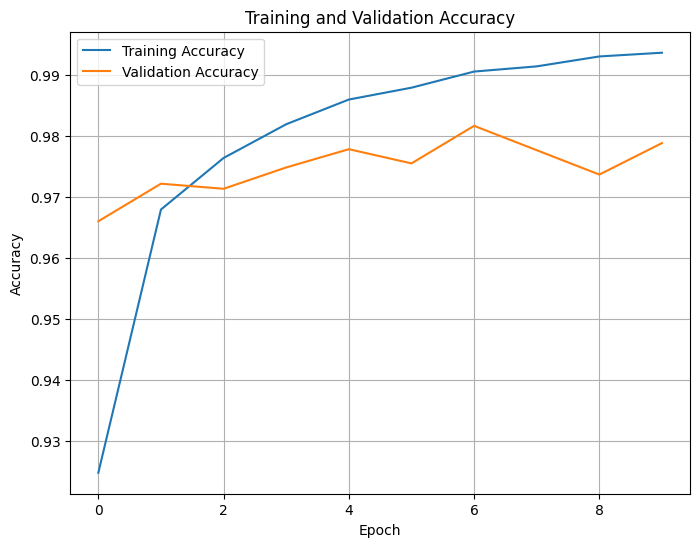

In [ ]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Normalize the pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 3: Define Neural Network Architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Input Layer (28x28 image → 784 vector)
    Dense(128, activation='relu'),        # First hidden layer (128 neurons, ReLU)
    Dense(64, activation='relu'),         # Second hidden layer (64 neurons, ReLU)
    Dense(10, activation='softmax')       # Output layer (10 classes, Softmax)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert output labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Train the model (Epoch = 10)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Step 5: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Step 6: Visualization (accuracy vs. epochs)
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


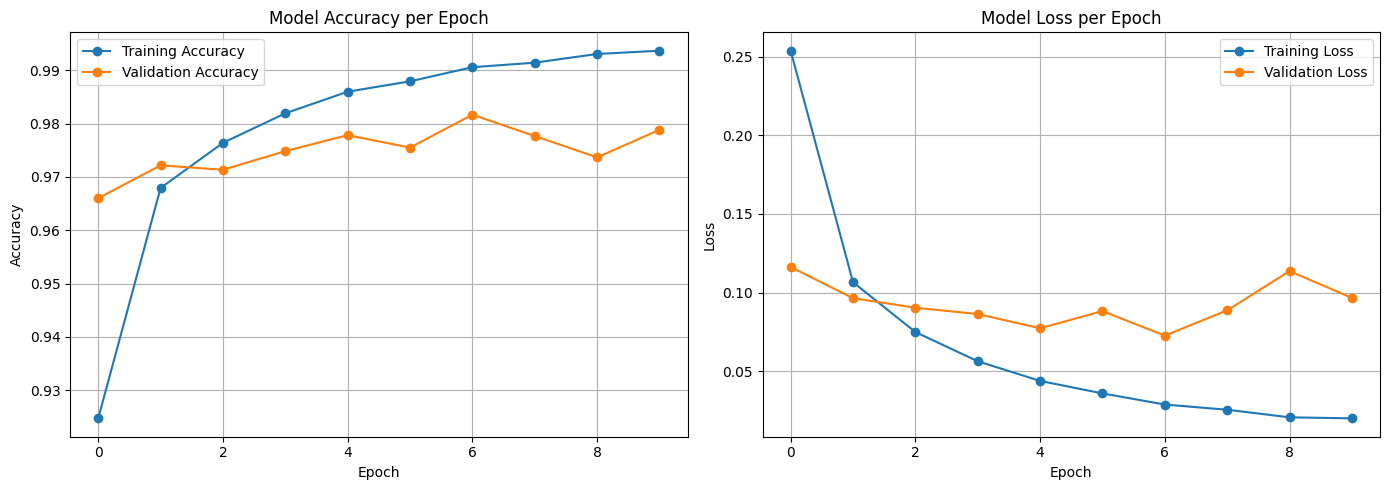

In [ ]:
# Create subplots: 1 row, 2 columns
plt.figure(figsize=(14, 5))

# Plot 1: Accuracy per Epoch
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker= 'o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker = 'o')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot 2: Loss per Epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker = 'o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker = 'o')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()
